In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


In [2]:
wallets_feats = pd.read_csv("./dataset/custom/features_fixed/wallets_features_with_users_agg.csv")

In [5]:
wallets_feats["incoming_tx_ts_gini"].value_counts()

incoming_tx_ts_gini
0.000000    770389
0.022727      2448
0.409091      1598
0.187500      1235
0.068966      1195
             ...  
0.086354         1
0.038011         1
0.093506         1
0.087379         1
0.005042         1
Name: count, Length: 5446, dtype: int64

Text(0.5, 1.0, 'Imcoming tx activity Gini coef')

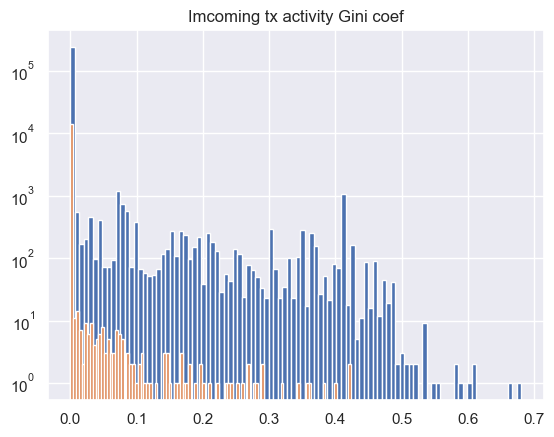

In [8]:
fig, ax = plt.subplots(1,1)
wallets_feats[wallets_feats["class"] == 2]["incoming_tx_ts_gini"].hist(bins=100)
wallets_feats[wallets_feats["class"] == 1]["incoming_tx_ts_gini"].hist(bins=100)

ax.set_yscale("log")
ax.set_title("Imcoming tx activity Gini coef")


Text(0.5, 1.0, 'Outcoming tx activity Gini coef')

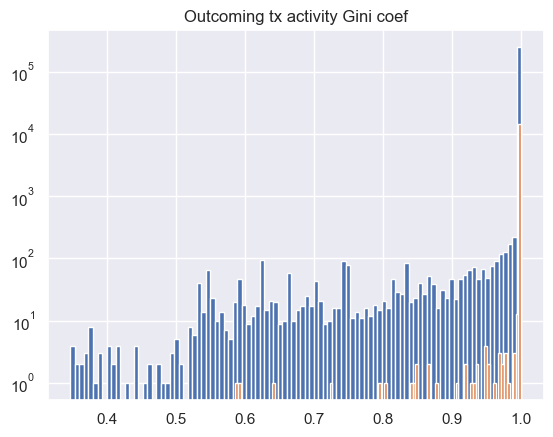

In [11]:
fig, ax = plt.subplots(1,1)
(1-wallets_feats[wallets_feats["class"] == 2]["outcoming_tx_ts_gini"]).hist(bins=100)
(1-wallets_feats[wallets_feats["class"] == 1]["outcoming_tx_ts_gini"]).hist(bins=100)

ax.set_yscale("log")
ax.set_title("Outcoming tx activity Gini coef")


In [20]:
wallets_feats.head()

,addrId,btc_received_total,btc_received_min,btc_received_max,btc_received_mean,incoming_tx_cnt,incoming_tx_input_address_cnt_mean,incoming_tx_output_address_cnt_mean,btc_received_gini,input_address_cnt,...,user_btc_received_total,user_btc_sent_median,user_btc_received_median,user_interracted_output_address_cnt,user_interracted_input_address_cnt,user_overall_activity_coef,user_user_ts_fees_share_mean,user_user_ts_fees_share_min,user_user_ts_fees_share_max,user_whole_fee_5
0,14YRXHHof4BY1TVxN5FqYPcEdpmXiYT78a,6.999303,6.999303,6.999303,6.999303,1.0,1.0,2.0,0.0,1.0,...,0.000000,0.174495,0.000000,2.0,1.0,0.000000,5.977542,5.977542,5.977542,1.0
1,13Lhad3SAmu2vqYg2dxbNcxH7LE77kJu2w,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,5.525902,0.000000,1.0,0.0,0.000000,0.597754,0.597754,0.597754,1.0
2,1MAQQZn7EHP6J3erXByCciFiVcgS8ZhWqz,0.390310,0.390310,0.390310,0.390310,1.0,4.0,2.0,0.0,4.0,...,0.760619,5.905637,0.190155,2.0,4.0,0.333333,0.597754,0.597754,0.597754,1.0
3,16zs5SVSyADh5WrLNbZbpRLsBsN5uEzgeK,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,3.770000,0.000000,1.0,0.0,0.000000,0.597754,0.597754,0.597754,1.0
4,1QJpwtUorBKPGUJkSyrRcBKTAHq4CXrdYh,3.200299,3.200299,3.200299,3.200299,1.0,1.0,2.0,0.0,1.0,...,0.000000,2.317006,0.000000,2.0,1.0,0.000000,0.597754,0.597754,0.597754,1.0


In [21]:
exchanges = wallets_feats[
    (wallets_feats["input_address_cnt"] > 100) &
    (wallets_feats["output_address_cnt"] > 100)
]

exchanges.shape, wallets_feats.shape

((43, 56), (822942, 56))

In [22]:
exchanges["class"].value_counts()

class
2    23
3    20
Name: count, dtype: int64

In [23]:
exchanges_addresses = exchanges["addrId"].reset_index().rename(columns={"addrId": "exchange_id"})

In [24]:

addr_addr_edges = pd.read_csv("./dataset/Elliptic++ Dataset/AddrAddr_edgelist.csv")

exchanges_to_output_nei = exchanges_addresses.merge(
    addr_addr_edges,
    how="left",
    left_on="exchange_id",
    right_on="input_address"
)[["exchange_id", "output_address"]].merge(
    wallets_feats[["addrId", "class"]],
    how="left",
    left_on="output_address",
    right_on="addrId"
)
exchanges_to_output_nei

,exchange_id,output_address,addrId,class
0,1FXqE2ixnnSB1kvwbMtWma5xQ2bVbkSq3f,1C4qDLgiKLcUZqiq4WxCSLMNBDZirz8bHX,1C4qDLgiKLcUZqiq4WxCSLMNBDZirz8bHX,2
1,1FXqE2ixnnSB1kvwbMtWma5xQ2bVbkSq3f,1hMhdsmRp7zfMgbHaiLpEvuGBNoAhm5qZ,1hMhdsmRp7zfMgbHaiLpEvuGBNoAhm5qZ,2
2,1FXqE2ixnnSB1kvwbMtWma5xQ2bVbkSq3f,1A1ZDydJfJBy4KrNbwbfGzr1EfqdFupBaP,1A1ZDydJfJBy4KrNbwbfGzr1EfqdFupBaP,2
3,1FXqE2ixnnSB1kvwbMtWma5xQ2bVbkSq3f,1PZS9VLJixGw1YgVJC4xNLDtarZHeSLM3M,1PZS9VLJixGw1YgVJC4xNLDtarZHeSLM3M,2
4,1FXqE2ixnnSB1kvwbMtWma5xQ2bVbkSq3f,16BaERnyURZoe89rt2yBpyZneEPM99zKfR,16BaERnyURZoe89rt2yBpyZneEPM99zKfR,3
...,...,...,...,...
41153,16ejK7NJ9B5D1t6k6fQiJEBo4swgCPV5rc,1PUHtfV8yhYaCNMskYraLRCUgkXCyrjLUV,1PUHtfV8yhYaCNMskYraLRCUgkXCyrjLUV,2
41154,16ejK7NJ9B5D1t6k6fQiJEBo4swgCPV5rc,1HvViTakugcFRwQLnaAF4jBLirUbcH63at,1HvViTakugcFRwQLnaAF4jBLirUbcH63at,2
41155,16ejK7NJ9B5D1t6k6fQiJEBo4swgCPV5rc,1QDBJcE98V6EJc96sZSJAVxFDK821WHcVt,1QDBJcE98V6EJc96sZSJAVxFDK821WHcVt,2
41156,16ejK7NJ9B5D1t6k6fQiJEBo4swgCPV5rc,3DLPEEngqwjAKPz7SgmMXMAtLWag4vnB2W,3DLPEEngqwjAKPz7SgmMXMAtLWag4vnB2W,2


In [25]:
exchanges_to_output_nei["class"].value_counts()

class
2    30431
3    10702
1       25
Name: count, dtype: int64

In [26]:

addr_addr_edges = pd.read_csv("./dataset/Elliptic++ Dataset/AddrAddr_edgelist.csv")

exchanges_to_input_nei = exchanges_addresses.merge(
    addr_addr_edges,
    how="left",
    left_on="exchange_id",
    right_on="output_address"
)[["exchange_id", "input_address"]].merge(
    wallets_feats[["addrId", "class"]],
    how="left",
    left_on="input_address",
    right_on="addrId"
)
exchanges_to_input_nei

,exchange_id,input_address,addrId,class
0,1FXqE2ixnnSB1kvwbMtWma5xQ2bVbkSq3f,1P2axntqznyH2drAzF7Fjv4kM2Vg2kBpHr,1P2axntqznyH2drAzF7Fjv4kM2Vg2kBpHr,2
1,1FXqE2ixnnSB1kvwbMtWma5xQ2bVbkSq3f,18Fvt2mc4ie3SfskZxn9VV3F3dGFWqxVB1,18Fvt2mc4ie3SfskZxn9VV3F3dGFWqxVB1,2
2,1FXqE2ixnnSB1kvwbMtWma5xQ2bVbkSq3f,1DFvKT9oMFtr9DL11QTWEnbWgrZgZ4FZn1,1DFvKT9oMFtr9DL11QTWEnbWgrZgZ4FZn1,2
3,1FXqE2ixnnSB1kvwbMtWma5xQ2bVbkSq3f,15zH5ufzHHMrPHiTVMccmTQNpkV7NmfY6d,15zH5ufzHHMrPHiTVMccmTQNpkV7NmfY6d,2
4,1FXqE2ixnnSB1kvwbMtWma5xQ2bVbkSq3f,1KNZ2kRVcPbz1Qjq8Fanrc8CmHk64yYiix,1KNZ2kRVcPbz1Qjq8Fanrc8CmHk64yYiix,2
...,...,...,...,...
59101,16ejK7NJ9B5D1t6k6fQiJEBo4swgCPV5rc,1Me1b7bzGscq6EyJMcENNhwvRTxHmMdhsz,1Me1b7bzGscq6EyJMcENNhwvRTxHmMdhsz,2
59102,16ejK7NJ9B5D1t6k6fQiJEBo4swgCPV5rc,19SuLrkGgcbF4FGiUAdD8UGYaKLNHEEAvT,19SuLrkGgcbF4FGiUAdD8UGYaKLNHEEAvT,3
59103,16ejK7NJ9B5D1t6k6fQiJEBo4swgCPV5rc,15nmNVEb1xSuSKJogENytMjVnQRHWqHFJc,15nmNVEb1xSuSKJogENytMjVnQRHWqHFJc,3
59104,16ejK7NJ9B5D1t6k6fQiJEBo4swgCPV5rc,1BBXFx7HFqWYBBWL4kNgJnCEVhQ1cuS5ka,1BBXFx7HFqWYBBWL4kNgJnCEVhQ1cuS5ka,2


In [27]:
exchanges_to_input_nei["class"].value_counts()

class
2    32173
3    26902
1       31
Name: count, dtype: int64

In [28]:
wallets_feats["class"].value_counts()

class
3    557588
2    251088
1     14266
Name: count, dtype: int64

In [29]:
14266/(251088 + 557588), 31 / (26902 + 32173)

(0.01764118138784878, 0.0005247566652560305)

In [30]:
(0.01764118138784878 / 0.0005247566652560305)

33.61783195119892

In [31]:
wallets_transacted_w_exchange = set(exchanges_to_input_nei["input_address"].tolist() + exchanges_to_output_nei["output_address"].tolist())

wallets_transacted_w_exchange_feats = wallets_feats[wallets_feats["addrId"].isin(wallets_transacted_w_exchange)]
wallets_transacted_w_exchange_feats.shape, len(wallets_transacted_w_exchange)

((62622, 56), 62622)

In [32]:
wallets_transacted_w_exchange_feats["class"].value_counts()

class
2    38324
3    24256
1       42
Name: count, dtype: int64

In [33]:
train_data_raw = pd.read_csv("./dataset/custom/features_fixed/wallets_features_with_users__train.csv")
test_data_raw = pd.read_csv("./dataset/custom/features_fixed/wallets_features_with_users__test.csv")

full_feats = pd.read_csv("./dataset/custom/features_fixed/wallets_features_with_users_agg.csv")


In [34]:
train_data_raw["exchange_flg"] = train_data_raw["addrId"].isin(set(exchanges_addresses["exchange_id"].tolist()))
test_data_raw["exchange_flg"] = test_data_raw["addrId"].isin(set(exchanges_addresses["exchange_id"].tolist()))
full_feats["exchange_flg"] = full_feats["addrId"].isin(set(exchanges_addresses["exchange_id"].tolist()))

train_data_raw["transacted_w_exchange_flg"] = train_data_raw["addrId"].isin(set(wallets_transacted_w_exchange_feats["addrId"].tolist()))
test_data_raw["transacted_w_exchange_flg"] = test_data_raw["addrId"].isin(set(wallets_transacted_w_exchange_feats["addrId"].tolist()))
full_feats["transacted_w_exchange_flg"] = full_feats["addrId"].isin(set(wallets_transacted_w_exchange_feats["addrId"].tolist()))


In [35]:
test_data_raw["transacted_w_exchange_flg"].value_counts()

transacted_w_exchange_flg
False    254755
True      26279
Name: count, dtype: int64

In [36]:
train_data_raw[train_data_raw["transacted_w_exchange_flg"] == True]["class"].value_counts()

class
2    21389
3    16558
1       27
Name: count, dtype: int64

In [37]:
train_data_raw.to_csv("./dataset/custom/features_fixed/wallets_features_with_users__train.csv", index=False)
test_data_raw.to_csv("./dataset/custom/features_fixed/wallets_features_with_users__test.csv", index=False)


In [38]:
full_feats.to_csv("./dataset/custom/features_fixed/wallets_features_with_users_agg1.csv", index=False)
